## Building Regression Models with Random Forest

**Here, I will be building a regression model of ```Acetylcholinesterase Inhibitors``` using ```Random Forest Algorithm```**

## 1. Importing Libraries

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 2. Reading the dataset

In [7]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## 3. Input Features

The **Acetylcholinesterase** dataset contains 881 input features and 1 output variable (pIC50 values).

#### 3.1 Input Features

In [8]:
X = df.drop('pIC50', axis = 1)

In [9]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6152,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6153,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### 3.2 Output Features

In [10]:
Y = df.pIC50


In [11]:
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6151    9.679854
6152    6.562249
6153    4.118045
6154    4.259637
6155    5.267606
Name: pIC50, Length: 6156, dtype: float64

#### 3.3 Examining dataset dimensions

In [12]:
X.shape

(6156, 881)

In [13]:
Y.shape

(6156,)

#### 3.4 Removing low variance features

In [14]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [15]:
X.shape

(6156, 144)

## 4. Data Split (80/20 Ratio)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [19]:
X_train.shape, Y_train.shape

((4924, 144), (4924,))

In [20]:
X_test.shape, Y_test.shape

((1232, 144), (1232,))

## 5. Building a Regression Model Using Random Forest

In [21]:
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)


In [22]:
r2

0.33640140334977076

In [23]:
Y_pred = model.predict(X_test)

## 6. Scatter plot of Experimental vs Predicted pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

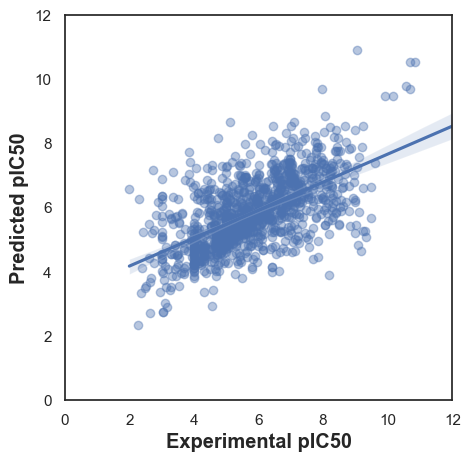

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show